Initial Data:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Outliers Removed: 1 rows dropped

Confusion Matrix:
 [[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]

--- Classification Metrics ---
Accuracy                 : 0.87
Error Rate               : 0.13
Precision (micro avg)    : 0.87
Recall (micro avg)       : 0.87


C:\Users\Admin\AppData\Local\Temp\ipykernel_45176\3228290122.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_45176\3228290122.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

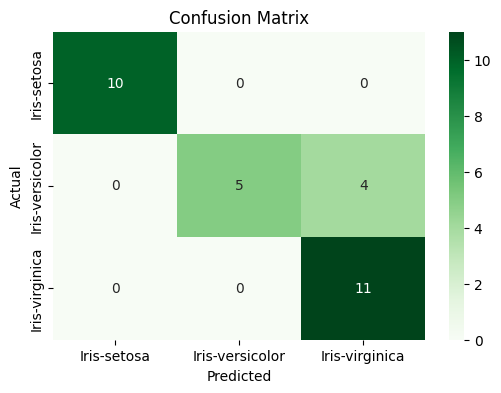

In [3]:
# Lab Assignment 6: Naive Bayes with Preprocessing on Iris Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Downloads/Iris.csv")
print("Initial Data:\n", df.head())

# --- 1. Data Preprocessing ---

# Drop ID column
df.drop("Id", axis=1, inplace=True)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values if any
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Detect and remove outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_cleaned = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]
print(f"\nOutliers Removed: {df.shape[0] - df_cleaned.shape[0]} rows dropped")

# Features and target
X = df_cleaned.drop("Species", axis=1)
y = df_cleaned["Species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (recommended for GaussianNB)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. Model Training ---
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 3. Evaluation ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=y.unique())
print("\nConfusion Matrix:\n", cm)

# Since it's multi-class, calculate metrics with 'micro' averaging
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Print metrics
metrics_dict = {
    "Accuracy": accuracy,
    "Error Rate": error_rate,
    "Precision (micro avg)": precision,
    "Recall (micro avg)": recall
}

print("\n--- Classification Metrics ---")
for key, value in metrics_dict.items():
    print(f"{key:<25}: {value:.2f}")

# --- 4. Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
